In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets, layers, models
from PIL import Image, ImageChops, ImageEnhance, ImageOps
from os import listdir, mkdir
from os.path import isfile, join
from sklearn import svm, model_selection, datasets
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
%matplotlib notebook
from tensorflow.keras.models import load_model
import matplotlib.image as mpimg
import imageio as im
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from time import time
import glob

In [29]:
batch_size= 64
num_classes= 3
epoch= 20
filas, columnas= 100,100

nb_train_samples = 2000
nb_validation_samples = 800

#xt = 'dataset\TrainAll'
#yt = 'dataset\TrainAll'
#xtest = 'dataset' 
#ytest = 'dataset\TestAll'

In [37]:
images = []
for img_path in glob.glob('dataset\TrainAll\freshapples'):
    images.append(mpimg.imread(img_path))

In [38]:
images = []
for img_path in glob.glob('dataset\TrainAll\freshbanana'):
    images.append(mpimg.imread(img_path))

In [39]:
images = []
for img_path in glob.glob('dataset\TrainAll\freshoranges'):
    images.append(mpimg.imread(img_path))

In [40]:
#Se puede disminuir las épocas para una prueba más rápida
#Podría demorar 1 minuto por época aproximadamente
epochs = 10
batch_size = 128

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape = (100, 100, 3), activation = 'relu'))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5)) # antes era 0.25

# Adding a second convolutional layer
model.add(layers.Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5)) # antes era 0.25

# Adding a third convolutional layer
model.add(layers.Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5)) # antes era 0.25

# Step 3 - Flattening
model.add(layers.Flatten())

# Step 4 - Full connection
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(units = 3, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)       

In [42]:
model.compile(optimizer = 'rmsprop',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory('dataset\TrainAll',
                                                 target_size = (100,100),
                                                 batch_size = batch_size,
                                                 class_mode ='categorical')

test_set = test_datagen.flow_from_directory('dataset\TestAll',
                                            target_size = (100, 100),
                                            batch_size = batch_size,
                                            class_mode ='categorical')

Found 4740 images belonging to 3 classes.
Found 1164 images belonging to 3 classes.


In [15]:
checkpointer= ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [16]:
history = model.fit_generator(training_set,
                              steps_per_epoch = nb_train_samples // batch_size,
                              epochs = epochs,
                              callbacks=[checkpointer],
                              validation_data = test_set,
                              validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
14/15 [===========================>..] - ETA: 1s - loss: 1.3767 - acc: 0.4587
Epoch 00001: val_acc improved from -inf to 0.34375, saving model to best_weights.hdf5
15/15 [==============================] - 18s 1s/step - loss: 1.3586 - acc: 0.4526 - val_loss: 1.0991 - val_acc: 0.3438
Epoch 2/10
14/15 [===========================>..] - ETA: 0s - loss: 1.1572 - acc: 0.3813
Epoch 00002: val_acc improved from 0.34375 to 0.52344, saving model to best_weights.hdf5
15/15 [==============================] - 15s 979ms/step - loss: 1.1483 - acc: 0.3953 - val_loss: 1.0154 - val_acc: 0.5234
Epoch 3/10
14/15 [===========================>..] - ETA: 0s - loss: 0.8617 - acc: 0.5781
Epoch 00003: val_acc improved from 0.52344 to 0.64323, saving model to best_weights.hdf5
15/15 [==============================] - 14s 962ms/step - loss: 0.8683 - acc: 0.5734 - val_loss: 0.8244 - val_acc: 0.6432
Epoch 4/10
14/15 [===========================>..] - ETA: 0s - loss: 0.6890 - acc: 0.7020
Epoch 00004: val_

In [17]:
model.load_weights('best_weights.hdf5')

In [18]:
model.save('shapes_cnn.h5')

<IPython.core.display.Javascript object>


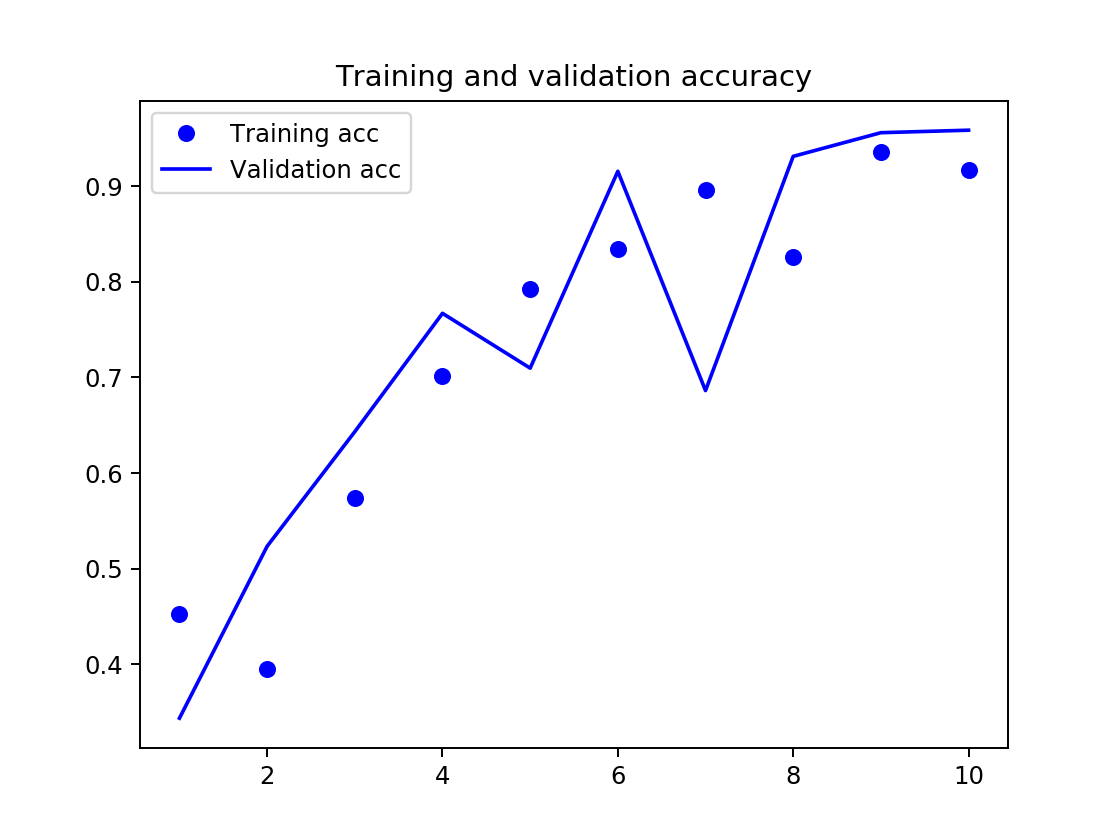

<IPython.core.display.Javascript object>


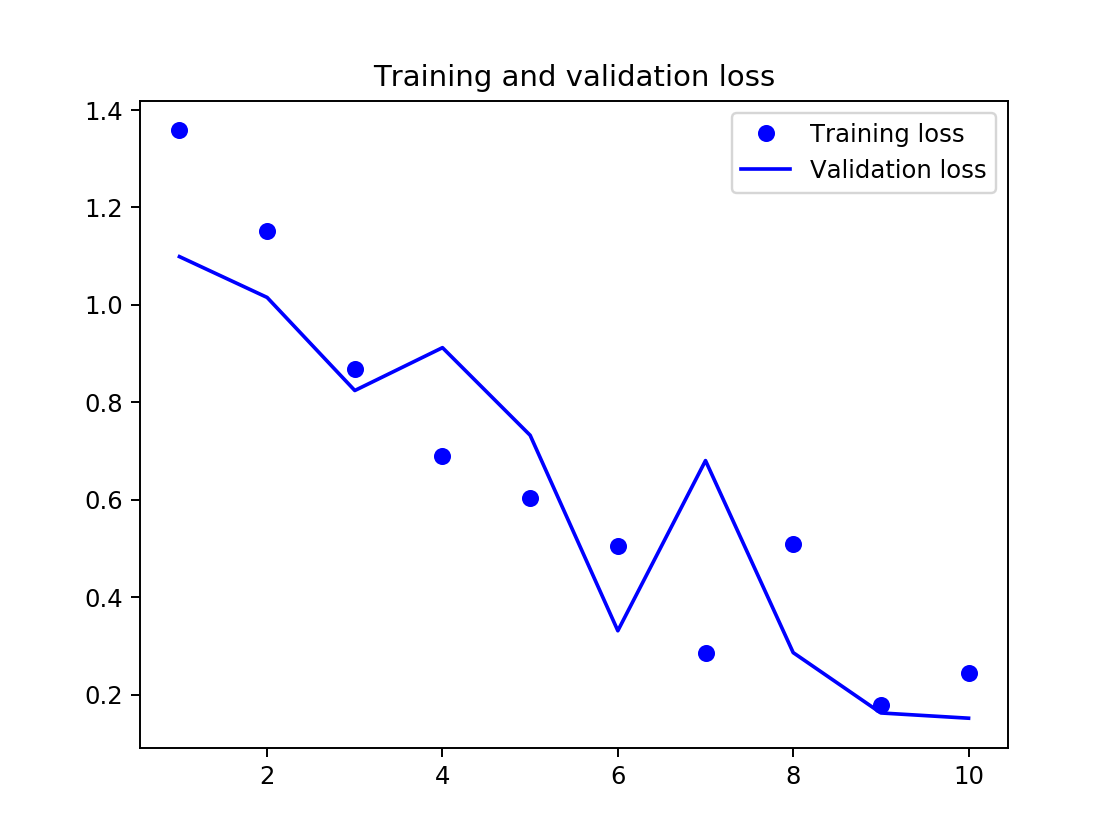

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


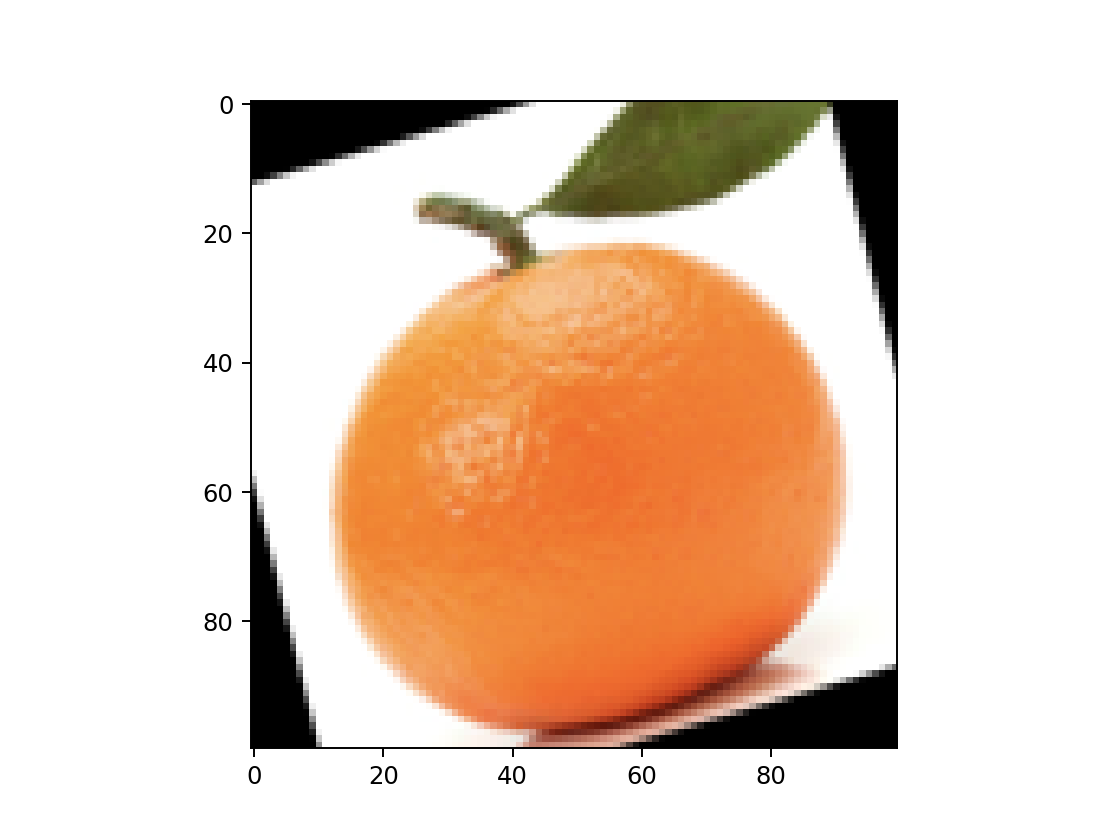

(1, 100, 100, 3)


In [51]:
#probando el entrenamiento con una imagen cualquiera
img_path = 'dataset/TestAll/freshoranges/resized_rotated_by_15_Screen Shot 2018-06-12 at 11.50.41 PM.png'

img = image.load_img(img_path, target_size=(100, 100))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

In [44]:
img = im.imread('dataset/TestAll/freshoranges/resized_rotated_by_15_Screen Shot 2018-06-12 at 11.50.41 PM.png')
img.shape

(100, 100, 3)

In [52]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=10)
print("Predicted class is:",classes)

Predicted class is: [1]


In [53]:
layer_outputs = [layer.output for layer in model.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [59]:
activations = activation_model.predict(img_tensor) # Returns a list of five Numpy arrays: one array per layer activation

In [60]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 100, 100, 32)


<IPython.core.display.Javascript object>


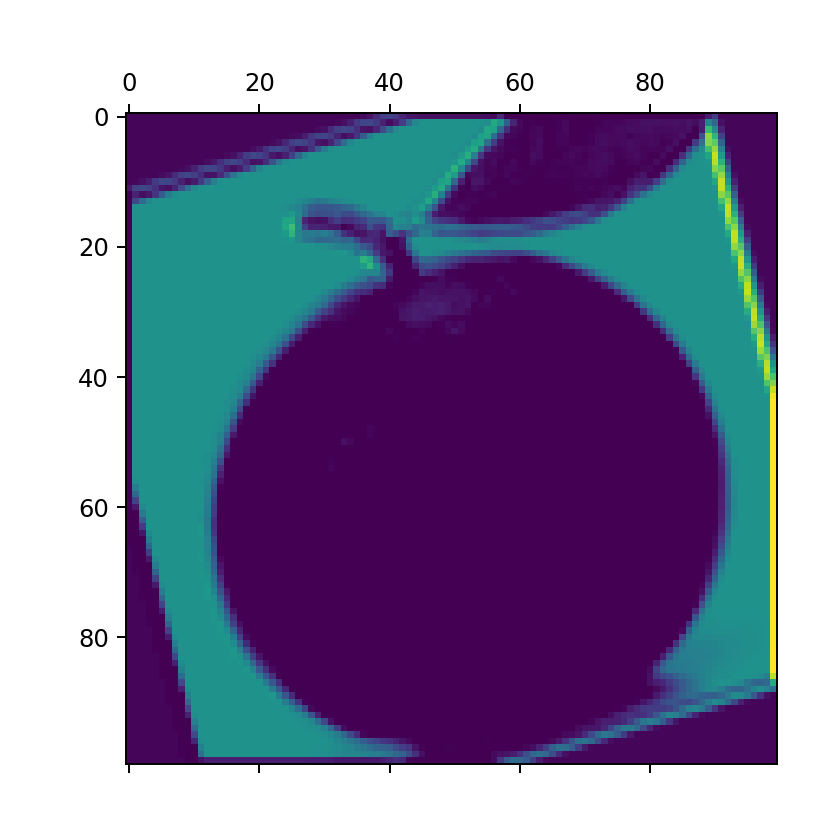

In [61]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


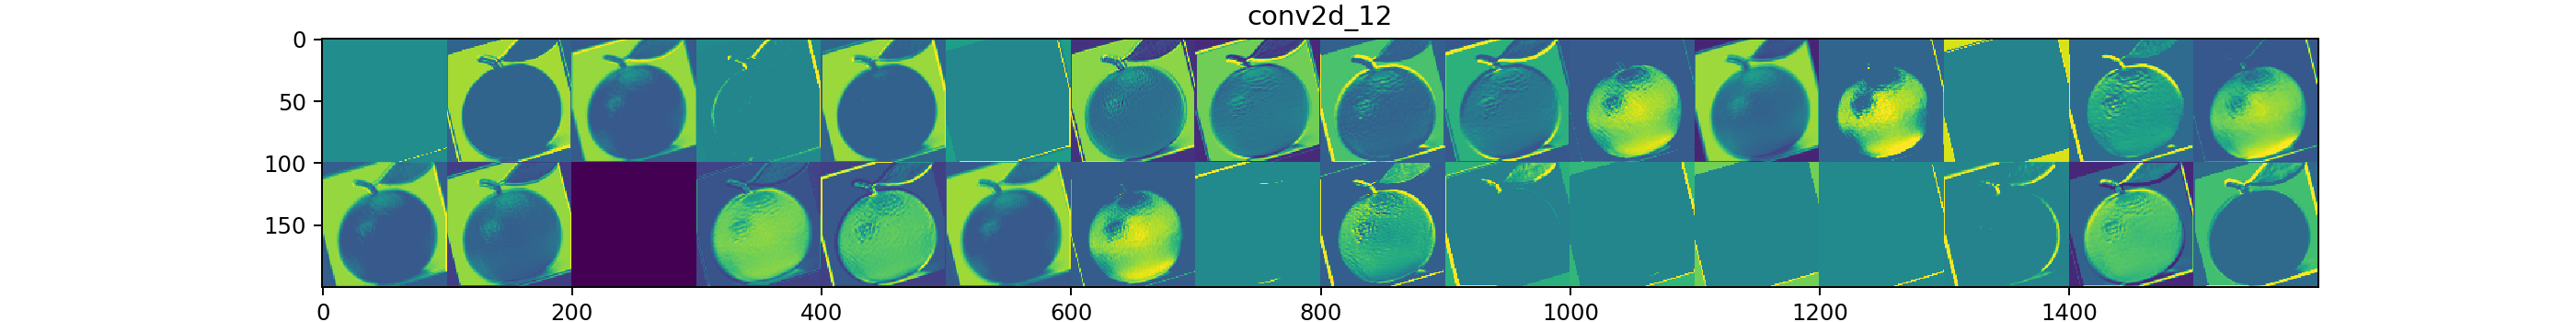

<IPython.core.display.Javascript object>


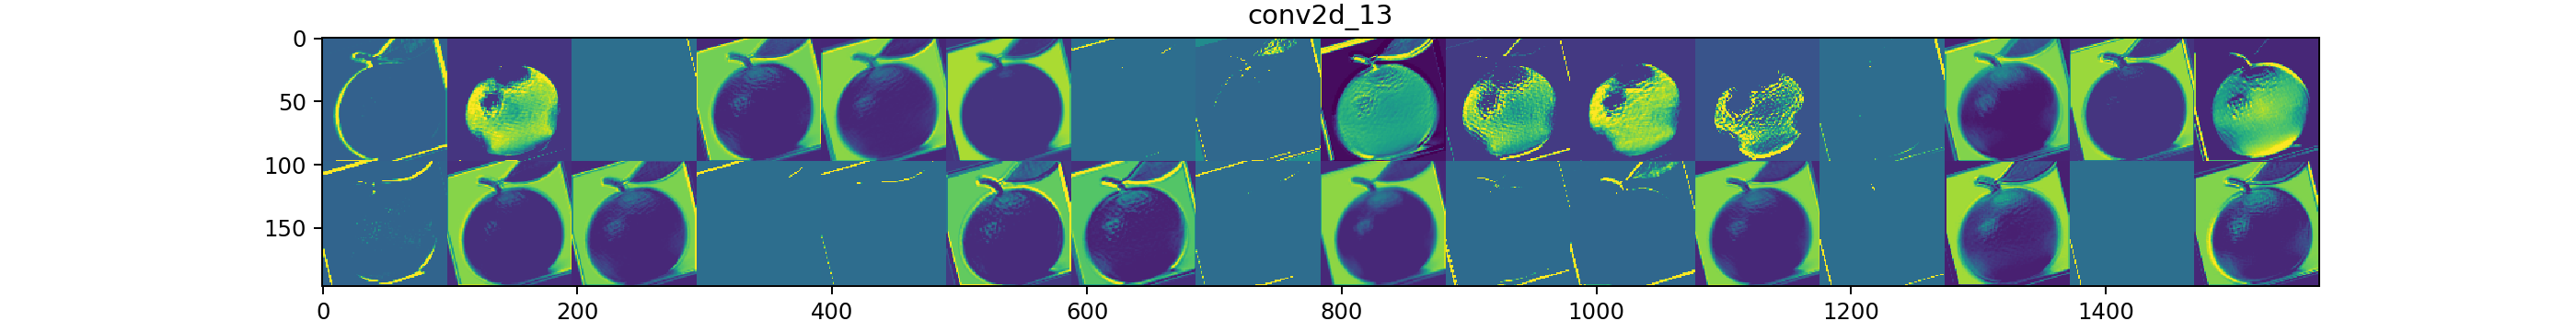

<IPython.core.display.Javascript object>


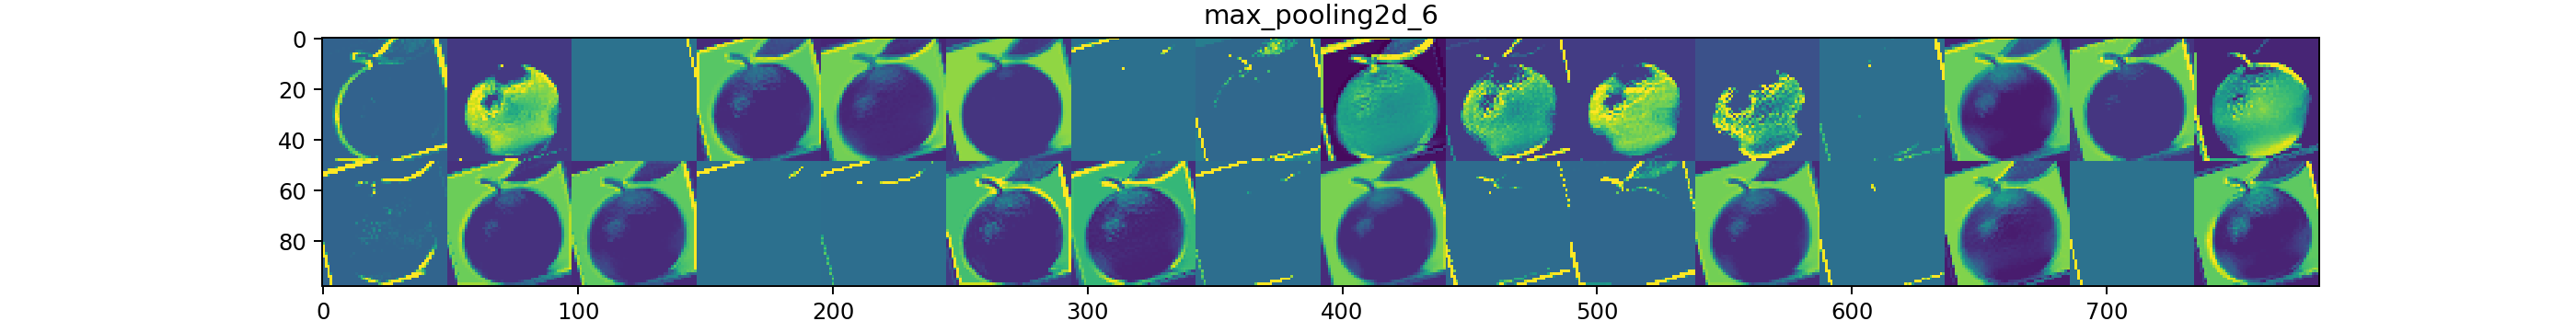

<IPython.core.display.Javascript object>


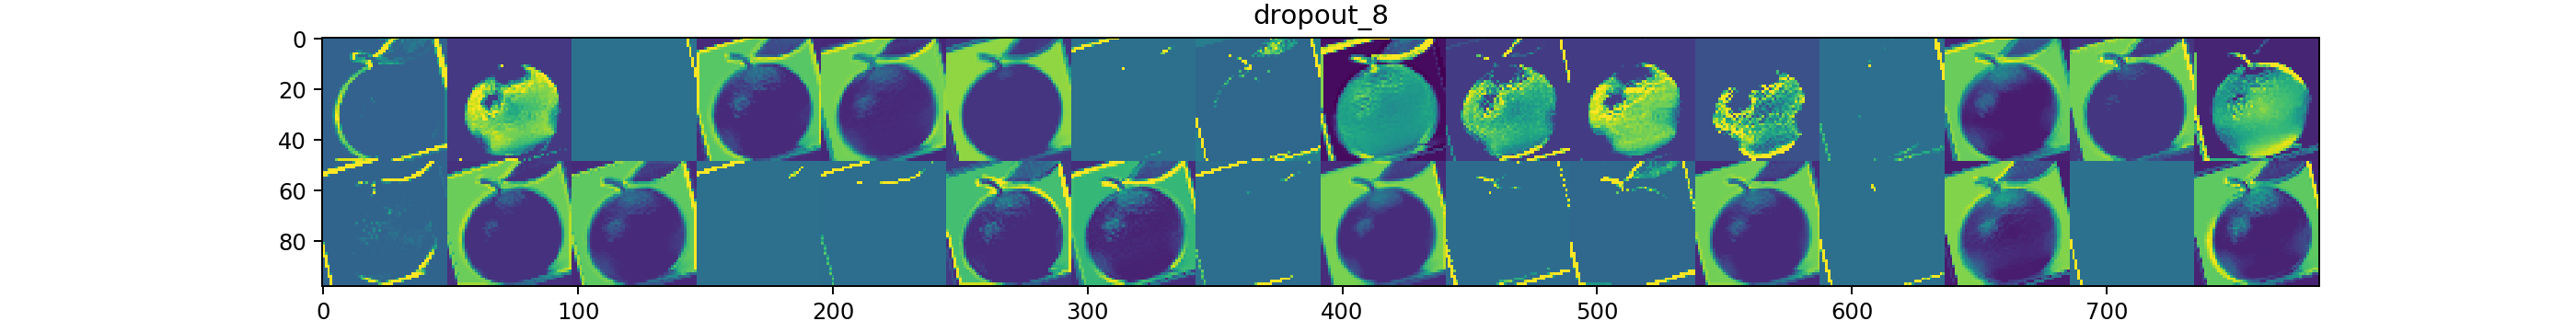

<IPython.core.display.Javascript object>


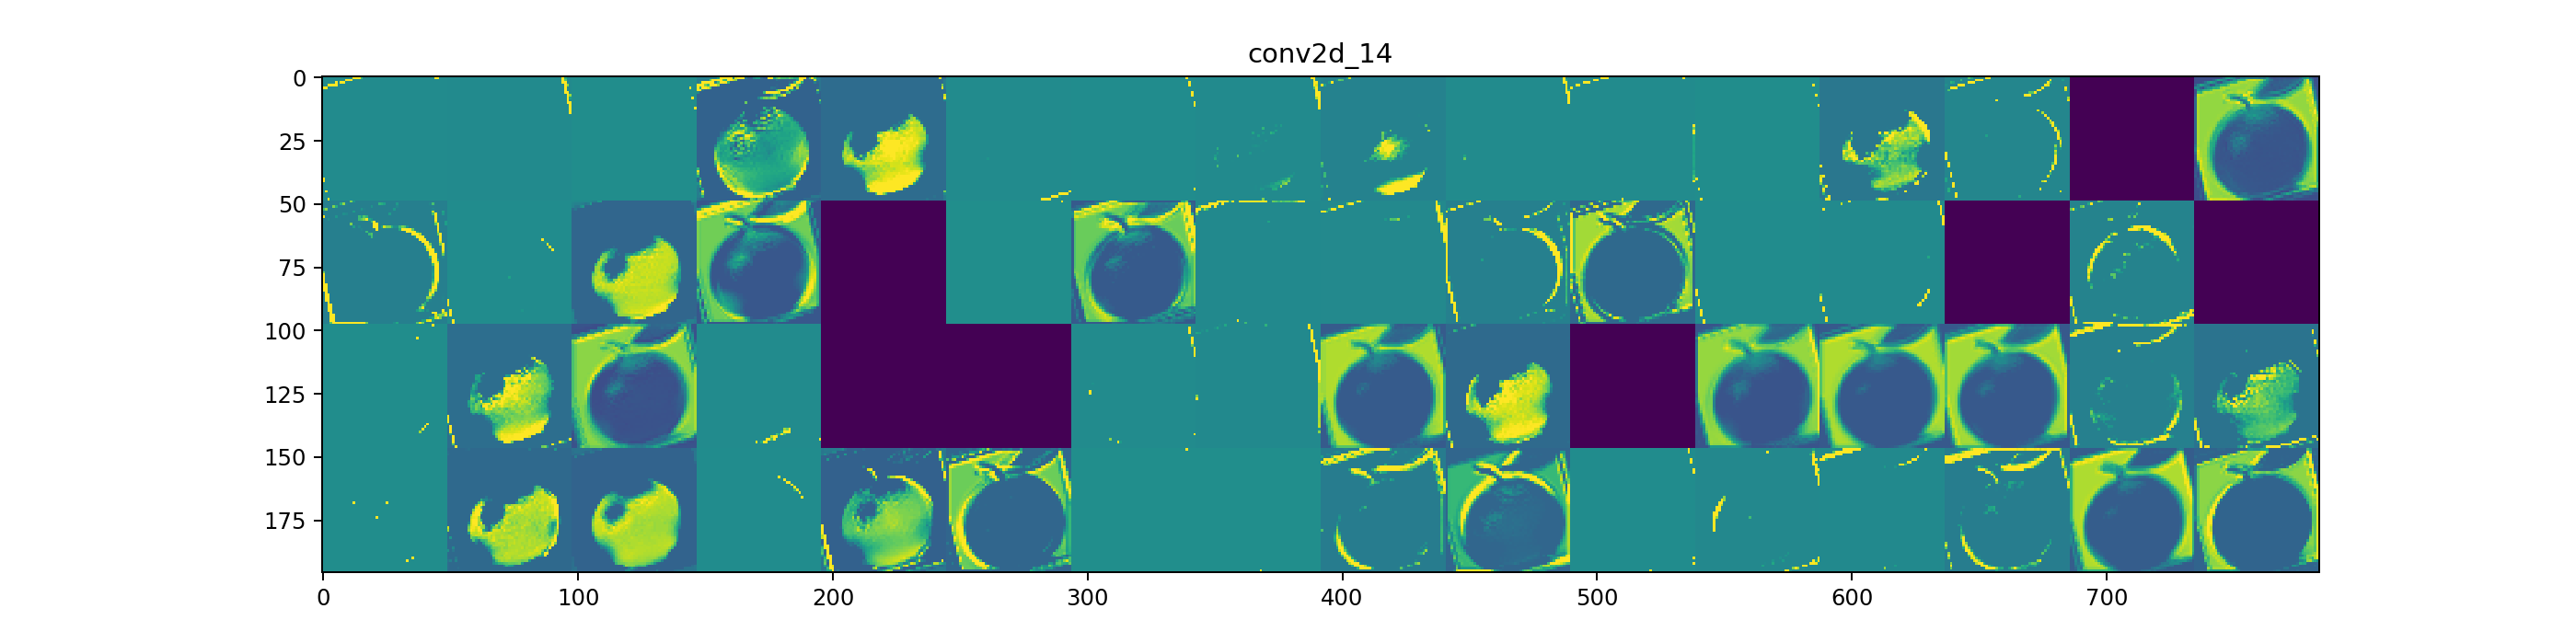

<IPython.core.display.Javascript object>


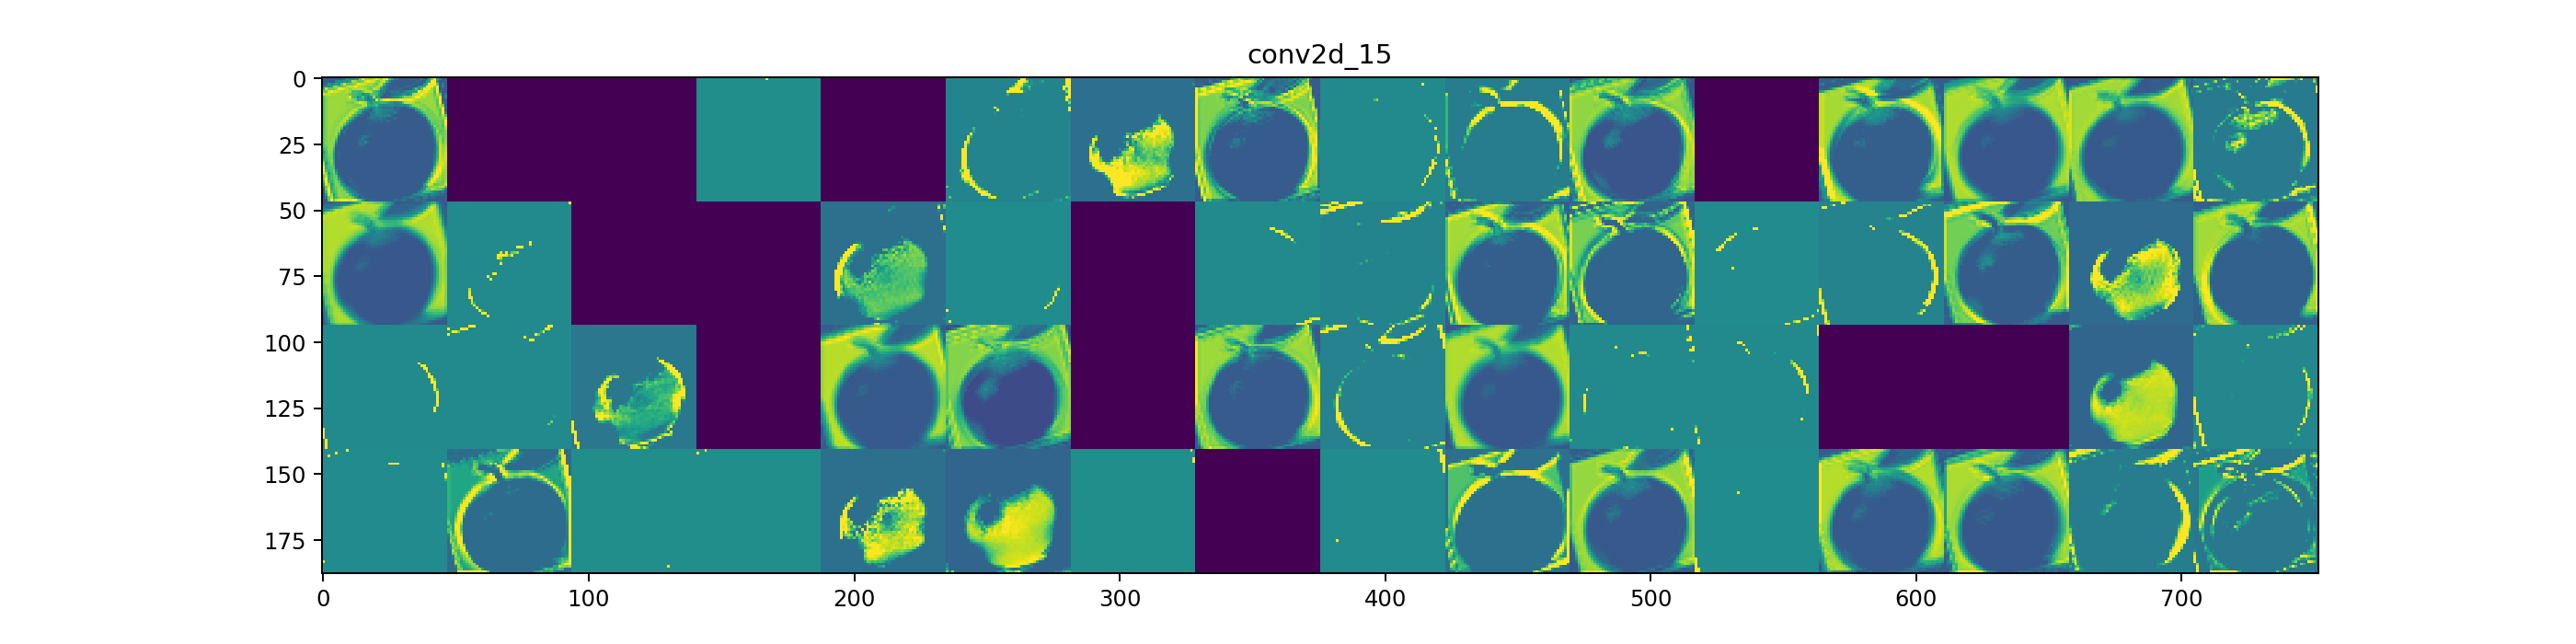

<IPython.core.display.Javascript object>


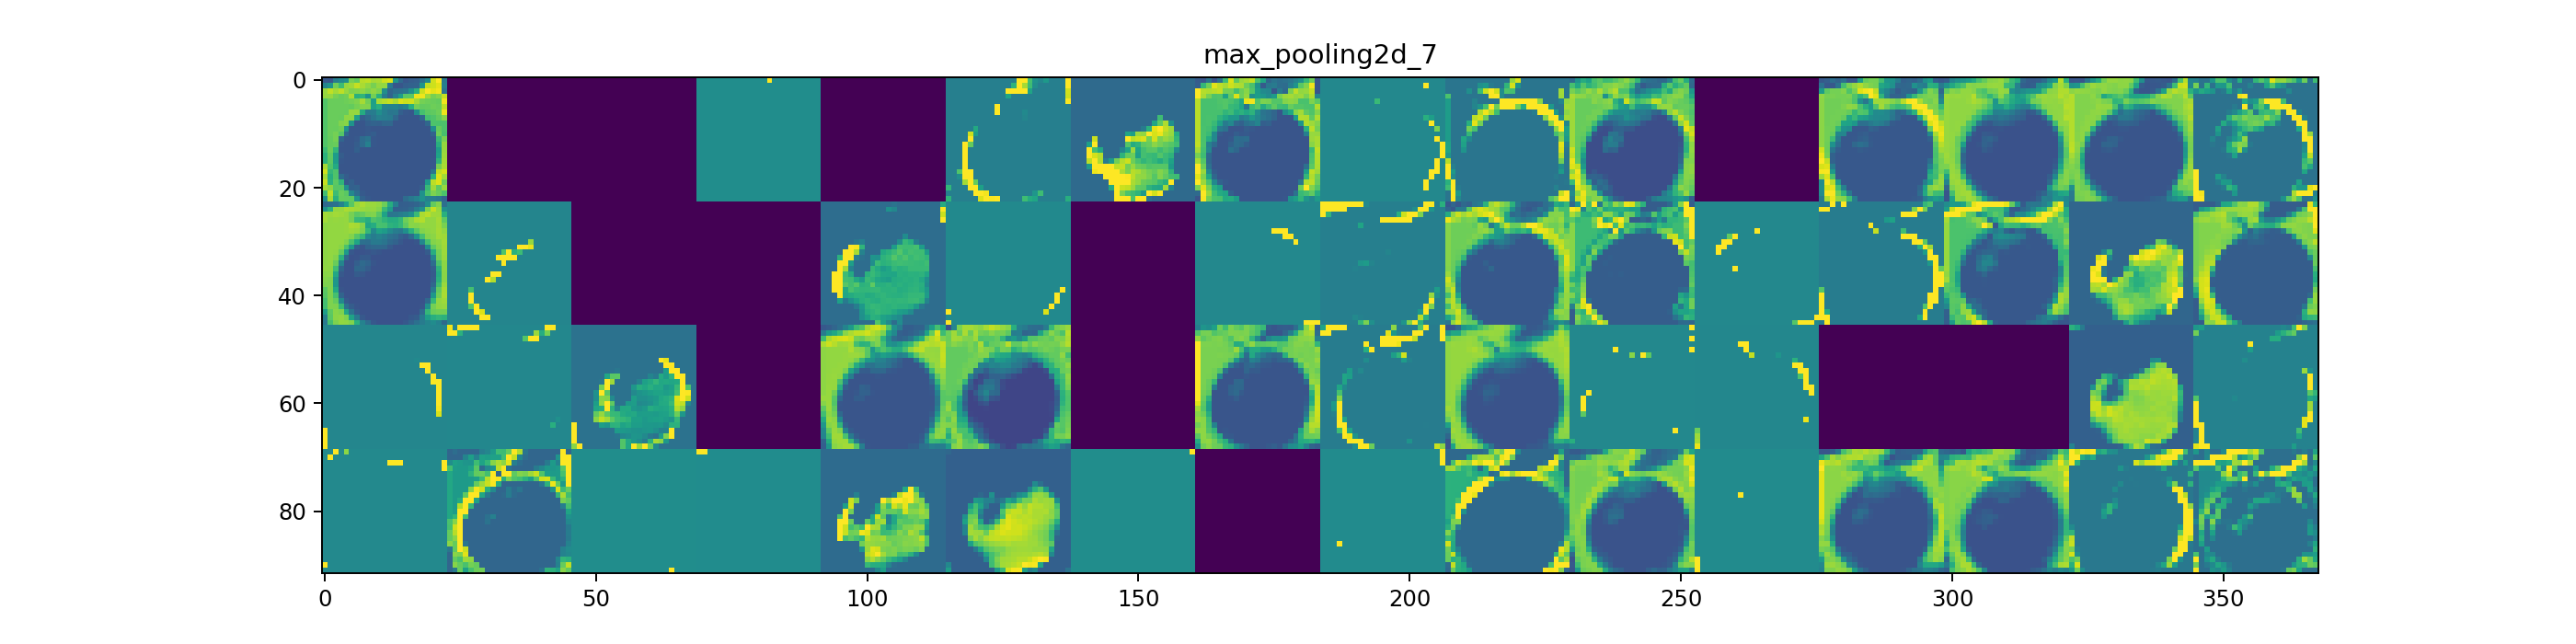

<IPython.core.display.Javascript object>


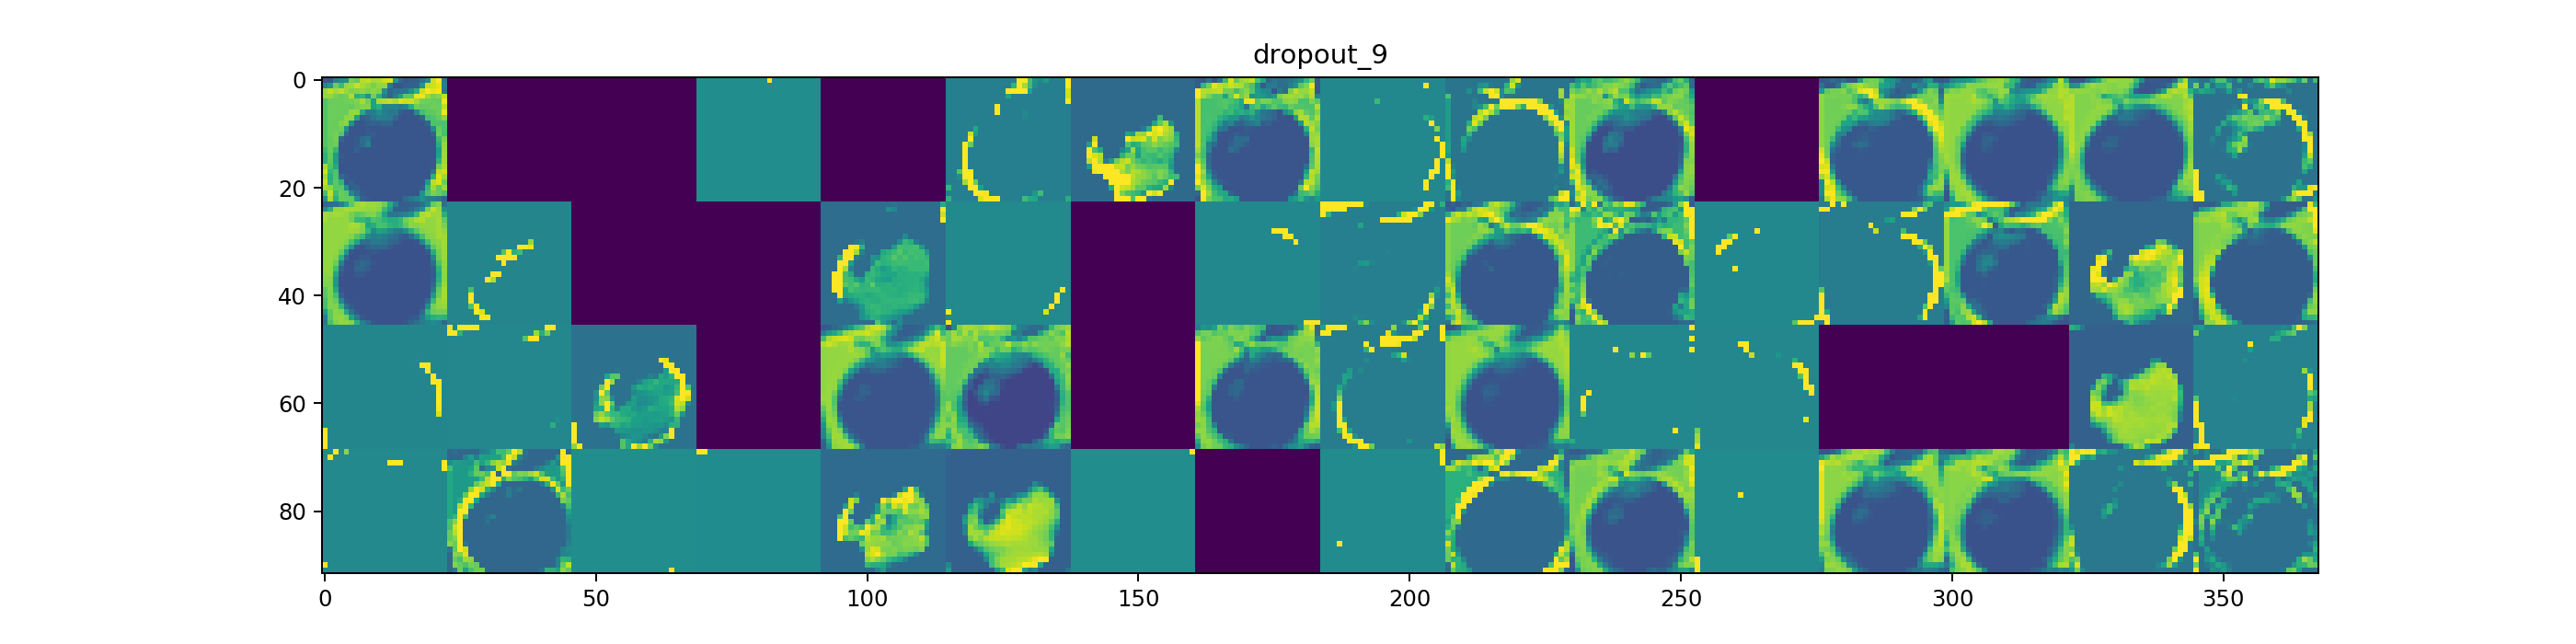

<IPython.core.display.Javascript object>


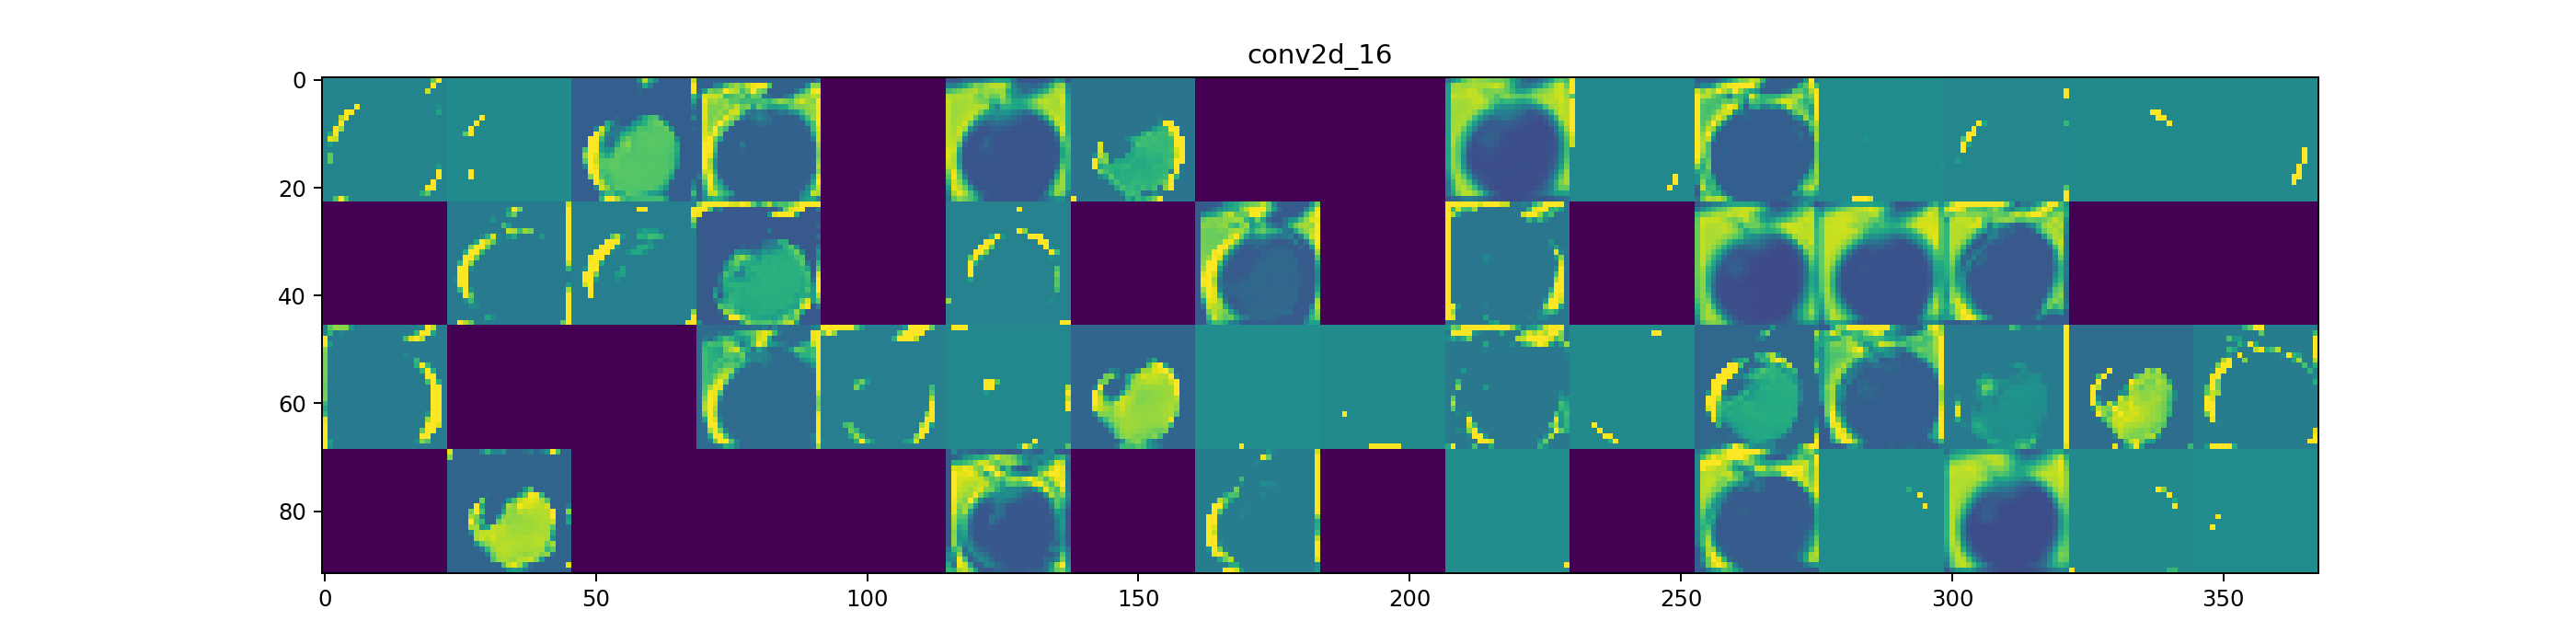

<IPython.core.display.Javascript object>


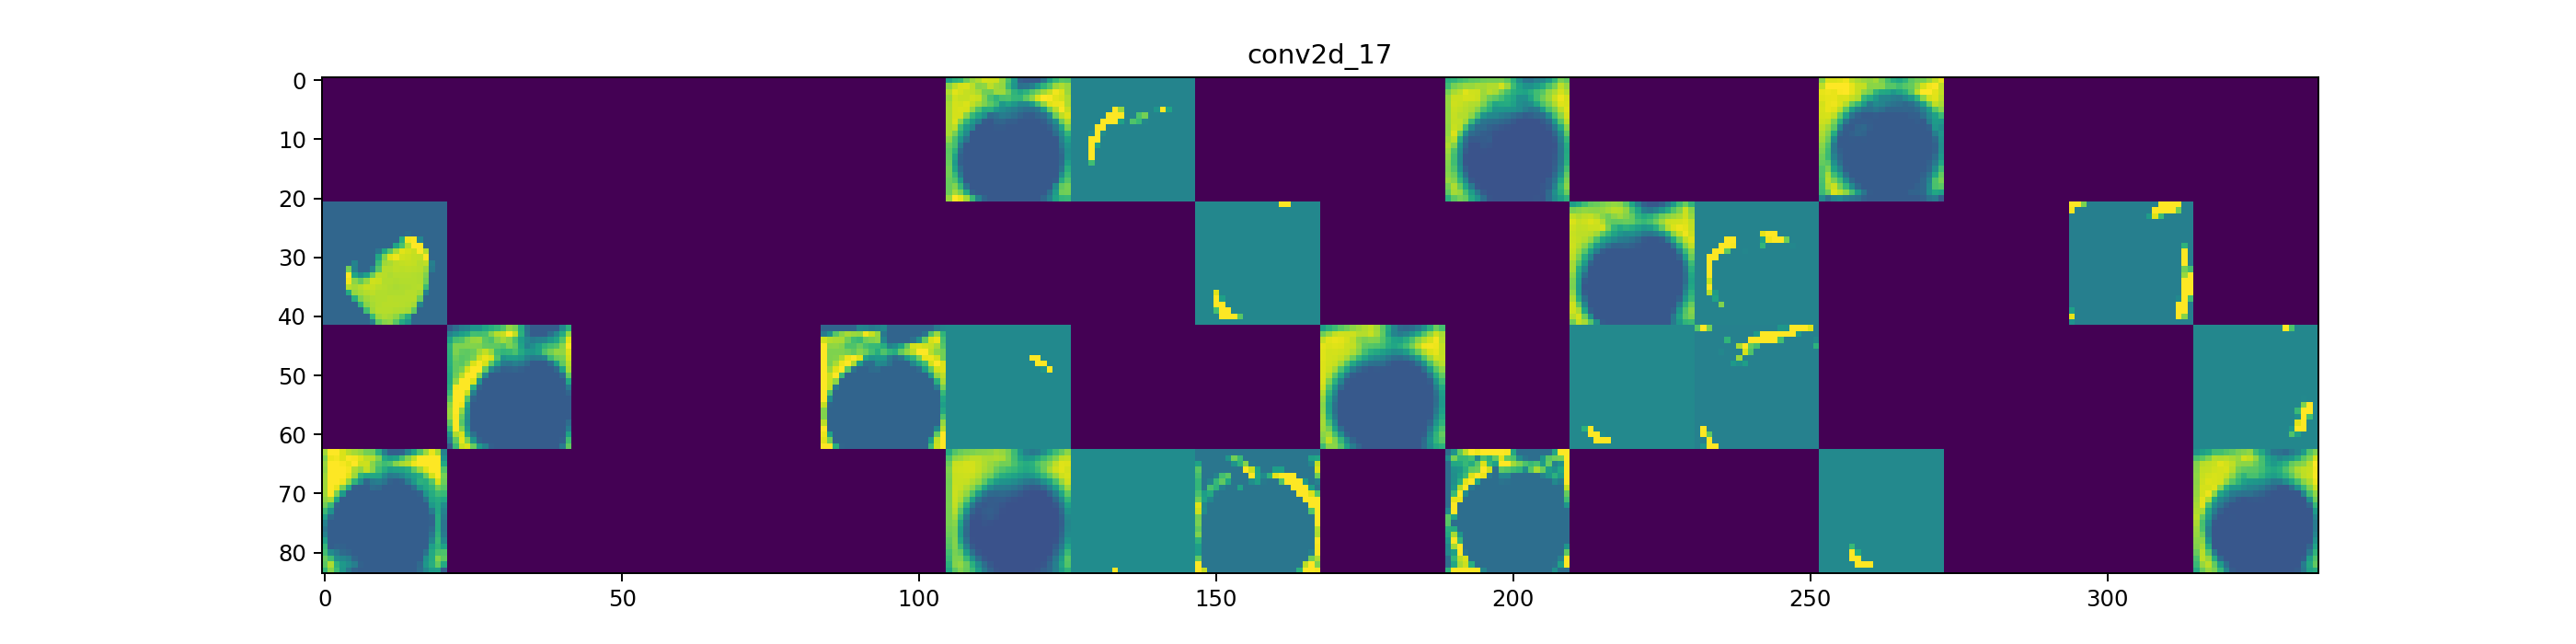

<IPython.core.display.Javascript object>


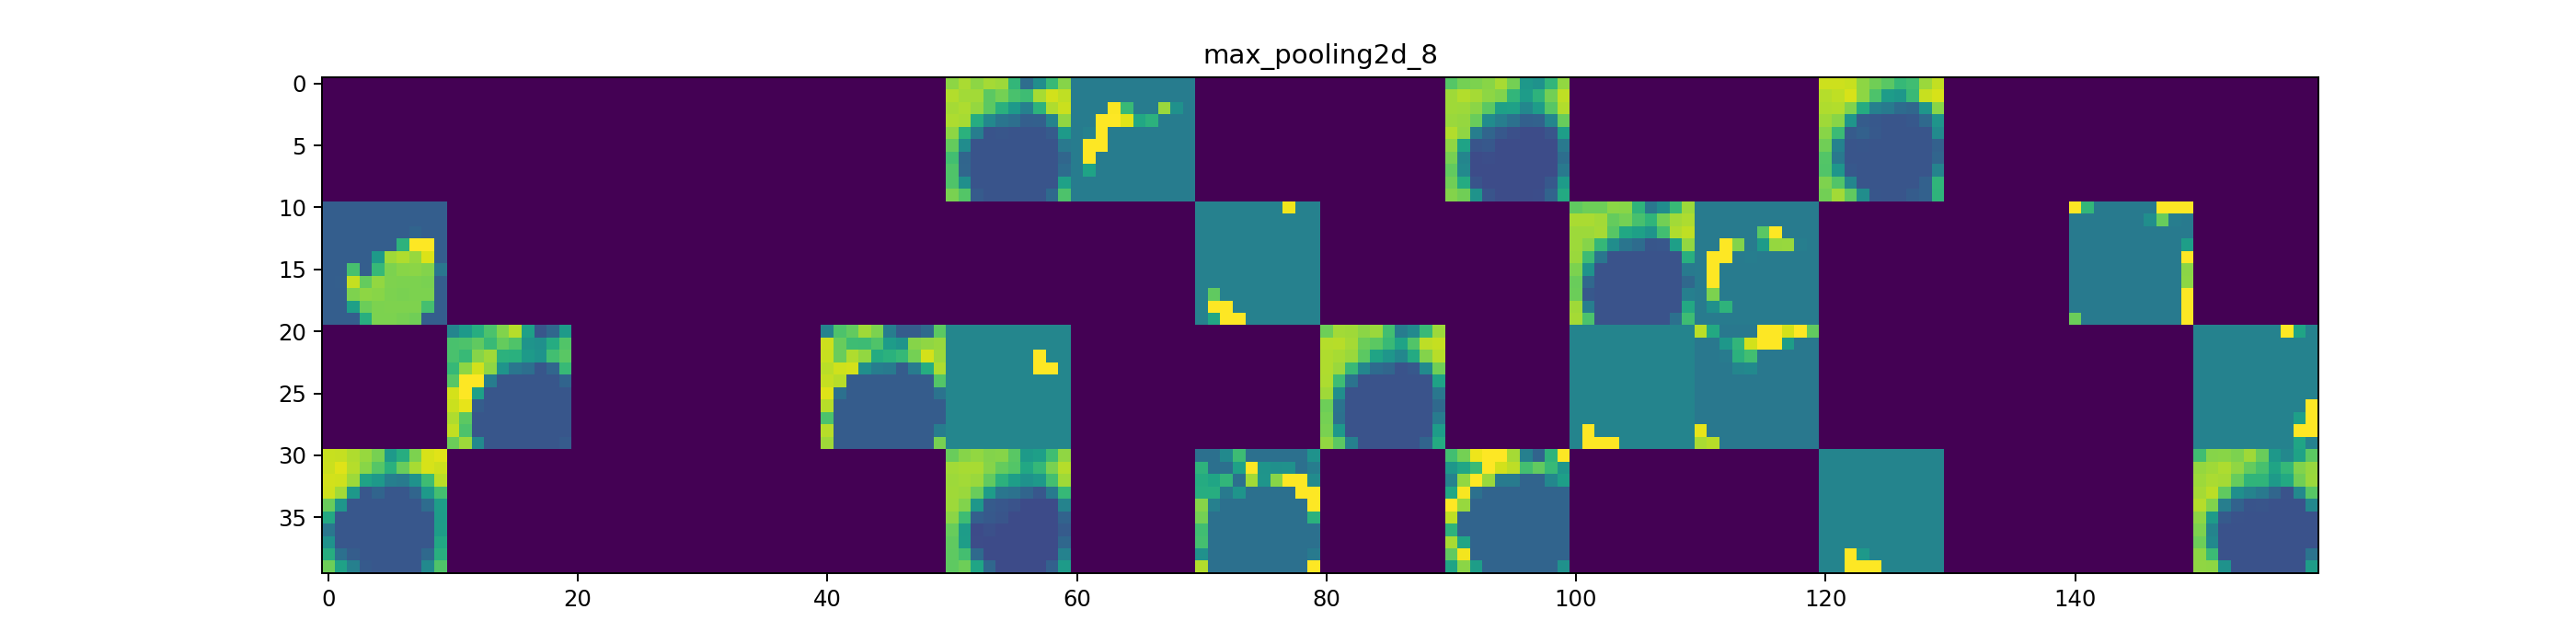

<IPython.core.display.Javascript object>


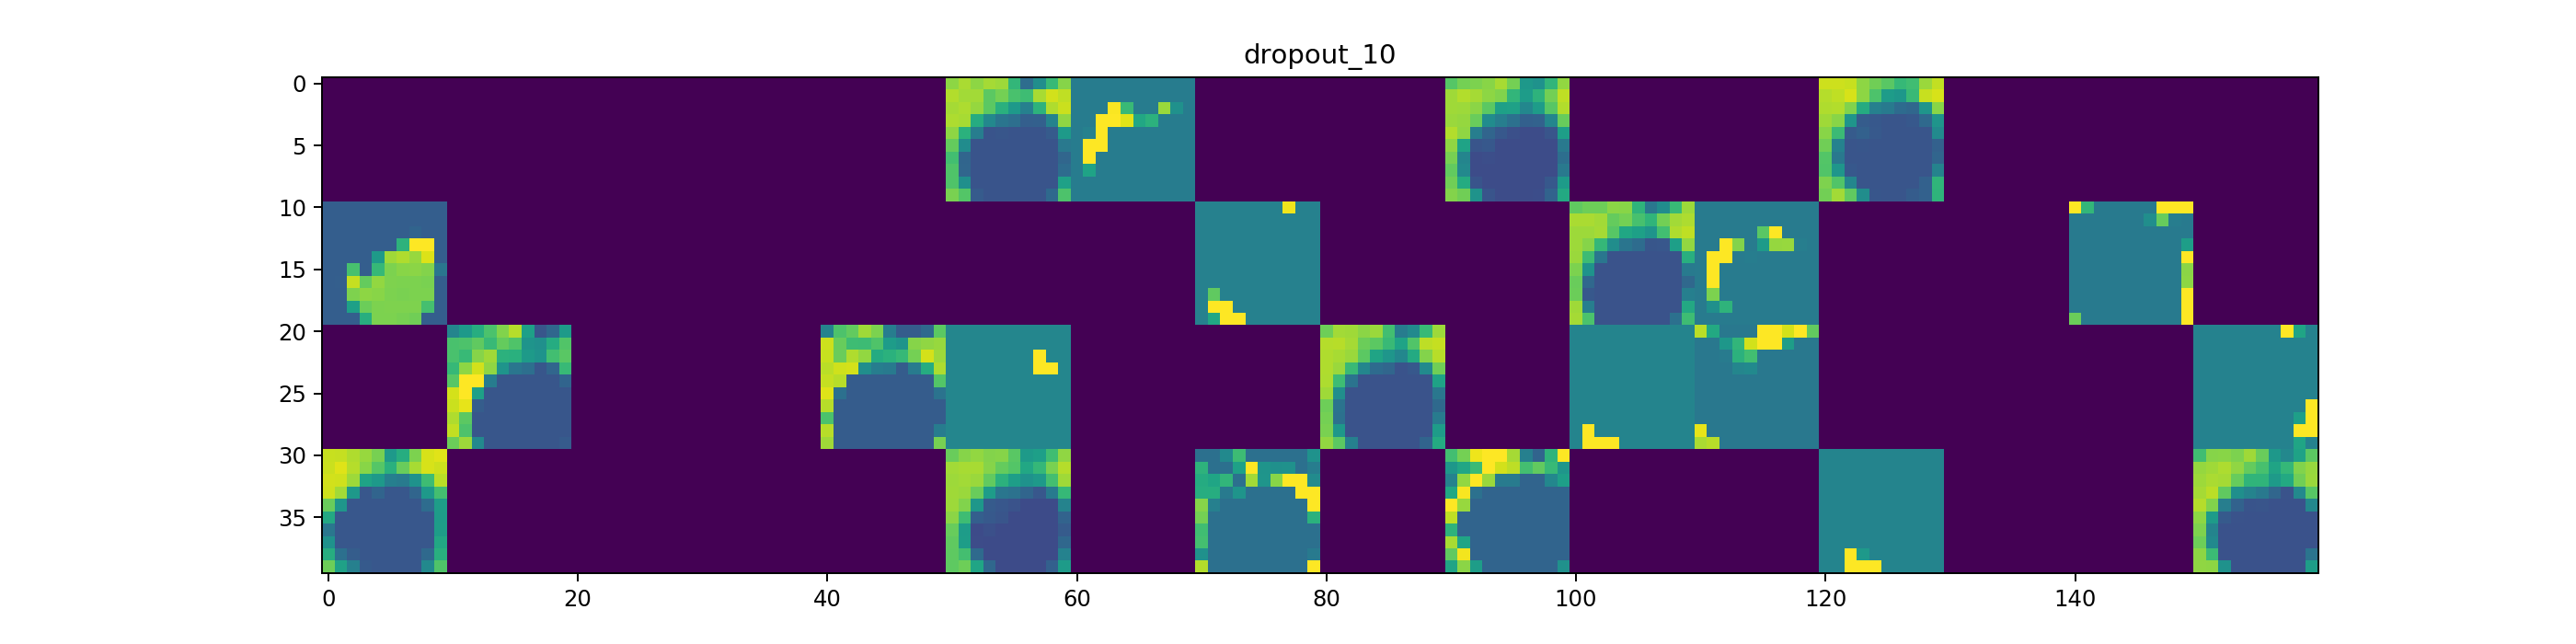

In [62]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')